# 0.) Import and Clean data

In [1]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

/Users/aryanhemani/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/var/folders/x1/w7v_rb6x76b1ltfzphz5s_900000gn/T/ipykernel_74575/800511604.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("Country-data.csv", sep = ",")

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
names = df[['country']].copy()

In [5]:
X = df.drop('country', axis=1)

scaler = StandardScaler().fit(X)

In [6]:
X_scaled = scaler.transform(X)

# 1.) kmeans Model with 5 Clusters

In [7]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)

KMeans(n_clusters=5)

# 2.) Picking two features to visualize

In [8]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

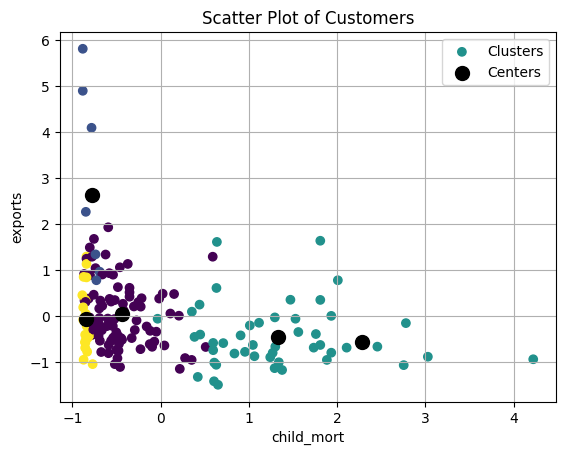

In [9]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 1


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [10]:
WCSSs=[]
ks = range(1,15)
for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=30).fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

In [11]:
WCSSs

[1503.0,
 1050.2145582853304,
 831.4244352086874,
 700.3229986404374,
 631.3877859960571,
 550.4475856323835,
 496.33791418412045,
 454.68204039064307,
 423.59111203926307,
 397.31550477387384,
 372.4410752833584,
 352.75217419922404,
 335.5246373287341,
 320.55215389841135]

# 4.) Use the above work and economic critical thinking to choose a number of clusters.

Text(0.5, 0, '# of Clusters')

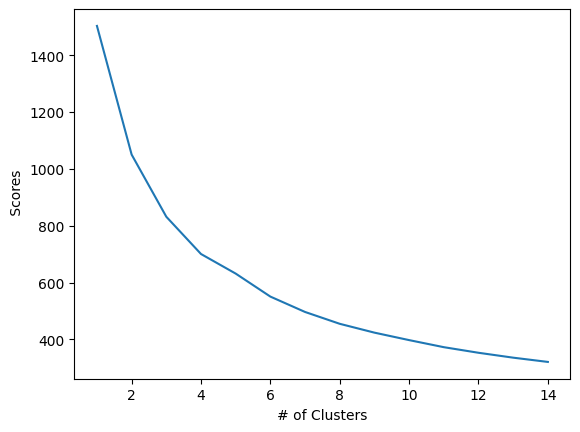

In [12]:
plt.plot(ks, WCSSs)
plt.ylabel(' Scores')
plt.xlabel('# of Clusters')

# 6.) Do the same for a silhoutte plot

In [13]:
from sklearn.metrics import silhouette_score

In [14]:
SCs=[]
ks = range(2,15)
for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=30).fit(X_scaled)
    labs = kmeans.labels_
    SCs.append(silhouette_score(X_scaled, labs))


Text(0.5, 0, '# of Clusters')

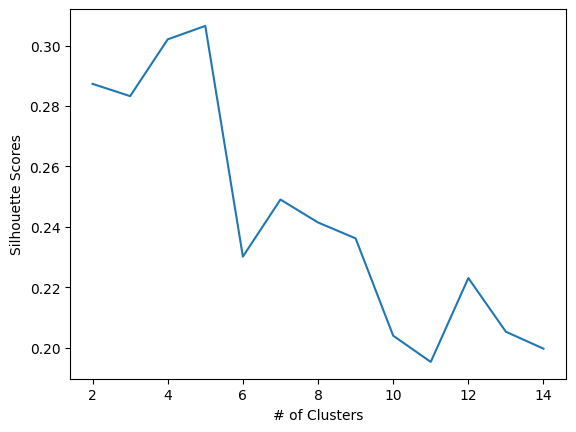

In [15]:
plt.plot(ks, SCs)
plt.ylabel('Silhouette Scores')
plt.xlabel('# of Clusters')

**Elbow Plot Analysis: The elbow plot demonstrates a significant drop in the Within-Cluster Sum of Square (WCSS) when the cluster count increases from 1 to 5. Beyond five clusters, the reduction in WCSS tapers off, suggesting limited gains in clustering quality.**

**Silhouette Score Analysis: The silhouette score, indicating cluster cohesion versus separation, peaks at five clusters, then declines with more clusters.**

**Despite data suggesting optimal cluster numbers might be 4 or 5, a strategic decision was made to use 2 clusters to categorize countries into "developed" and "developing" groups. This choice emphasizes simplicity and theoretical applicability over purely data-led recommendations from the WCSS and silhouette analyses.**

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [16]:
kmeans = KMeans(n_clusters = 2, n_init=30, init='random').fit(X_scaled)



In [17]:
preds = pd.DataFrame(kmeans.predict(X_scaled))

In [18]:
output = pd.concat([preds, df], axis=1)

In [19]:
output.head()

,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,1,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,0,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [20]:
print("Cluster 1: ", )
print(list(output[output[0] == 0]["country"]))

Cluster 1: 
['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Indonesia', 'Iraq', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Mongolia', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Philippines', 'Rwanda', 'Samoa', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Tonga', 'Turkmenistan', 'Uganda', 'Uzbekistan', 'Vanuatu', 'Yemen', 'Zambia']


In [21]:
print("Cluster 2: ", )
print(list(output[output[0] == 1]["country"]))

Cluster 2: 
['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Canada', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Hungary', 'Iceland', 'Iran', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Moldova', 'Montenegro', 'Morocco', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea

**Category 1 includes countries recognized for their well-established economies and development, covering various areas including Europe (Germany, France, and the UK), North America (Canada and the US), Asia (Japan and South Korea), and the Middle East (Israel and the UAE). Characteristics of these countries include higher standards of living, advanced healthcare facilities, and increased life expectancy.**

**Category 2 is made up of countries often identified as developing, with common traits such as lower economic output, higher rates of child mortality, and shorter average lifespans. This category is largely composed of nations from Sub-Saharan Africa (e.g., Angola, Chad), South Asia (Afghanistan, Bangladesh), and certain Pacific regions (Vanuatu, Solomon Islands), which are generally more prone to economic instability and health challenges, and thus, in greater need of external aid and development efforts.**

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [22]:
output1 = output.drop('country', axis=1)
output1.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294
1,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798


In [23]:
output1.groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189
1,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127


# 9.) Write an observation about the descriptive statistics.

Descriptive statistics highlight clear differences between two clusters:

- **Child Mortality**: Cluster 1 shows much lower child mortality rates, pointing to superior healthcare and higher child survival rates.
  
- **Income**: There's a pronounced income disparity, with Cluster 1 enjoying significantly greater incomes, reflecting their more advanced economic status.

- **Life Expectancy**: Countries in Cluster 1 benefit from longer life spans, indicating better health and medical care.

- **Fertility**: The lower fertility rates in Cluster 1 suggest higher education levels and greater workforce participation among women.

- **GDP per Capita**: Cluster 1's substantially higher GDP per capita emphasizes its economic advancement.

Variability within each cluster, particularly in income and GDP per capita for Cluster 1, shows that countries within a cluster still vary in economic and health outcomes. Essentially, these clusters distinguish between the developed world (Cluster 1), characterized by strong economies and health systems, and the developing world (Cluster 2), grappling with economic and health challenges.